In [174]:
# import dependencies

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pickle


In [175]:
# read the data
df = pd.read_csv('marketing_campaign_dataset.csv')

# filter data for just NexGen Systems and Language is English
filtered_df = df[(df['Company'] == 'NexGen Systems')]


filtered_df


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Sales Lift
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,$64885.26
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,$106938.00
6,7,NexGen Systems,Email,Women 35-44,60 days,Website,0.13,"$11,067.00",2.86,Los Angeles,Spanish,817,8749,10,Tech Enthusiasts,2021-01-07,$31651.62
10,11,NexGen Systems,Display,Men 25-34,45 days,Email,0.12,"$8,590.00",3.49,New York,Spanish,321,6628,10,Tech Enthusiasts,2021-01-11,$29979.10
22,23,NexGen Systems,Social Media,Women 35-44,15 days,YouTube,0.13,"$8,699.00",2.12,Miami,French,646,3841,5,Health & Wellness,2021-01-23,$18441.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199965,199966,NexGen Systems,Social Media,All Ages,15 days,YouTube,0.08,"$18,098.00",3.09,Chicago,German,247,2978,4,Foodies,2021-11-07,$55922.82
199967,199968,NexGen Systems,Influencer,Women 35-44,45 days,Website,0.05,"$18,261.00",6.60,Houston,Mandarin,398,5009,2,Foodies,2021-11-09,$120522.60
199969,199970,NexGen Systems,Social Media,All Ages,60 days,Instagram,0.14,"$14,899.00",7.08,New York,Spanish,753,9673,4,Outdoor Adventurers,2021-11-11,$105484.92
199981,199982,NexGen Systems,Social Media,All Ages,30 days,Website,0.08,"$6,396.00",4.54,Los Angeles,German,576,5294,8,Outdoor Adventurers,2021-11-23,$29037.84


In [176]:
# define 'Sales Lift' (dependent variable) as y

y = filtered_df['Sales Lift']

In [177]:
# Convert Acquisition_Cost column from $ to float
filtered_df['Acquisition_Cost'] = filtered_df['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)
# Split the string on space and take the first part (the number), then convert to integer
filtered_df['Duration'] = filtered_df['Duration'].str.split().str[0].astype(int)


/var/folders/f7/dl42drj92qg78wp87m730h3m0000gn/T/ipykernel_56530/450998258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Acquisition_Cost'] = filtered_df['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)
/var/folders/f7/dl42drj92qg78wp87m730h3m0000gn/T/ipykernel_56530/450998258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Duration'] = filtered_df['Duration'].str.split().str[0].astype(int)


In [178]:
# define the features (independent variables) as X
# exclude 'Sales Lift','ROI', and 'Campaign_ID' from the features
X = filtered_df.drop(['Sales Lift', 'ROI', 'Campaign_ID', 'Clicks', 'Impressions', 'Conversion_Rate','Engagement_Score'], axis=1)

In [179]:
# Handle missing values with mean imputation for numerical variables and mode imputation for categorical variables

# for col in X.columns:
#     if X[col].dtype == 'object':
#         X[col].fillna(X[col].mode()[0], inplace=True)
#     else:
#         X[col].fillna(X[col].mean(), inplace=True)

In [195]:
filtered_df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date', 'Sales Lift'],
      dtype='object')

In [180]:
# convert date column to datetime format

X['Date'] = pd.to_datetime(X['Date'])
X['year'] = X['Date'].dt.year
X['month'] = X['Date'].dt.month
X['day'] = X['Date'].dt.day

# Drop the original date column
X = X.drop('Date', axis=1)

# convert categorical variables to dummy variables
X = pd.get_dummies(X)

X

,Duration,Acquisition_Cost,year,month,day,Company_NexGen Systems,Campaign_Type_Display,Campaign_Type_Email,Campaign_Type_Influencer,Campaign_Type_Search,...,Language_English,Language_French,Language_German,Language_Mandarin,Language_Spanish,Customer_Segment_Fashionistas,Customer_Segment_Foodies,Customer_Segment_Health & Wellness,Customer_Segment_Outdoor Adventurers,Customer_Segment_Tech Enthusiasts
1,60,11566.0,2021,1,2,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
4,15,16452.0,2021,1,5,True,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
6,60,11067.0,2021,1,7,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
10,45,8590.0,2021,1,11,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
22,15,8699.0,2021,1,23,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199965,15,18098.0,2021,11,7,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
199967,45,18261.0,2021,11,9,True,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
199969,60,14899.0,2021,11,11,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
199981,30,6396.0,2021,11,23,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [181]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [182]:
X_train

,Duration,Acquisition_Cost,year,month,day,Company_NexGen Systems,Campaign_Type_Display,Campaign_Type_Email,Campaign_Type_Influencer,Campaign_Type_Search,...,Language_English,Language_French,Language_German,Language_Mandarin,Language_Spanish,Customer_Segment_Fashionistas,Customer_Segment_Foodies,Customer_Segment_Health & Wellness,Customer_Segment_Outdoor Adventurers,Customer_Segment_Tech Enthusiasts
44074,60,10843.0,2021,10,2,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
62022,15,5001.0,2021,12,4,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
79958,30,7264.0,2021,1,24,True,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
56799,60,17769.0,2021,8,13,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
145677,60,5833.0,2021,2,12,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137741,45,14923.0,2021,5,17,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
119172,15,7669.0,2021,7,2,True,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
155975,15,10416.0,2021,5,1,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
118666,30,17109.0,2021,2,11,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [183]:
# Remove the dollar sign and commas, then convert to float
y_train = y_train.str.replace('$', '').str.replace(',', '').astype(float)
y_test = y_test.str.replace('$', '').str.replace(',', '').astype(float)

In [184]:
# instantiate models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42, n_estimators=100, verbose=1)


In [185]:
# fit the models
lrModel = lr.fit(X_train, y_train)
rfModel = rf.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.0s


In [186]:
# evaluate the model on the test data
print(f"lr_score: {lrModel.score(X_test, y_test)}")
print(f"rf_score: {rfModel.score(X_test, y_test)}")

lr_score: 0.4660071809675529
rf_score: 0.4421079044501979


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [187]:
# do predictions on the test data
pred_lr = lrModel.predict(X_test)
pred_rf = rfModel.predict(X_test)
pred_avg = (pred_lr + pred_rf) / 2


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [188]:
# calculate the performance of the random forest model

print('Linear Regression MSE:', mean_squared_error(y_test, pred_lr))
print('Linear Regression MAE:', mean_absolute_error(y_test, pred_lr))

print('Random Forest MSE:', mean_squared_error(y_test, pred_rf))
print('Random Forest MAE:', mean_absolute_error(y_test, pred_rf))

print('Combined MSE:', mean_squared_error(y_test, pred_avg))
print('Combined MAE:', mean_absolute_error(y_test, pred_avg))


Linear Regression MSE: 529334685.76771206
Linear Regression MAE: 18796.29451081112
Random Forest MSE: 553025483.7981274
Random Forest MAE: 19065.035186848356
Combined MSE: 535708558.55522704
Combined MAE: 18873.54608731274


In [189]:
# get coefficients of the linear regression model
coefficients = lrModel.coef_

# get the feature importance of the random forest model
importance = rfModel.feature_importances_


In [190]:
# Create graphs for the feature importance and coefficients

columns = X_train.columns
lrGraph = pd.Series(coefficients, columns).sort_values(ascending=False)
rfGraph = pd.Series(importance, columns).sort_values(ascending=False)
columns

Index(['Duration', 'Acquisition_Cost', 'year', 'month', 'day',
       'Company_NexGen Systems', 'Campaign_Type_Display',
       'Campaign_Type_Email', 'Campaign_Type_Influencer',
       'Campaign_Type_Search', 'Campaign_Type_Social Media',
       'Target_Audience_All Ages', 'Target_Audience_Men 18-24',
       'Target_Audience_Men 25-34', 'Target_Audience_Women 25-34',
       'Target_Audience_Women 35-44', 'Channel_Used_Email',
       'Channel_Used_Facebook', 'Channel_Used_Google Ads',
       'Channel_Used_Instagram', 'Channel_Used_Website',
       'Channel_Used_YouTube', 'Location_Chicago', 'Location_Houston',
       'Location_Los Angeles', 'Location_Miami', 'Location_New York',
       'Language_English', 'Language_French', 'Language_German',
       'Language_Mandarin', 'Language_Spanish',
       'Customer_Segment_Fashionistas', 'Customer_Segment_Foodies',
       'Customer_Segment_Health & Wellness',
       'Customer_Segment_Outdoor Adventurers',
       'Customer_Segment_Tech Enthusias

<Axes: title={'center': 'Coefficients'}>

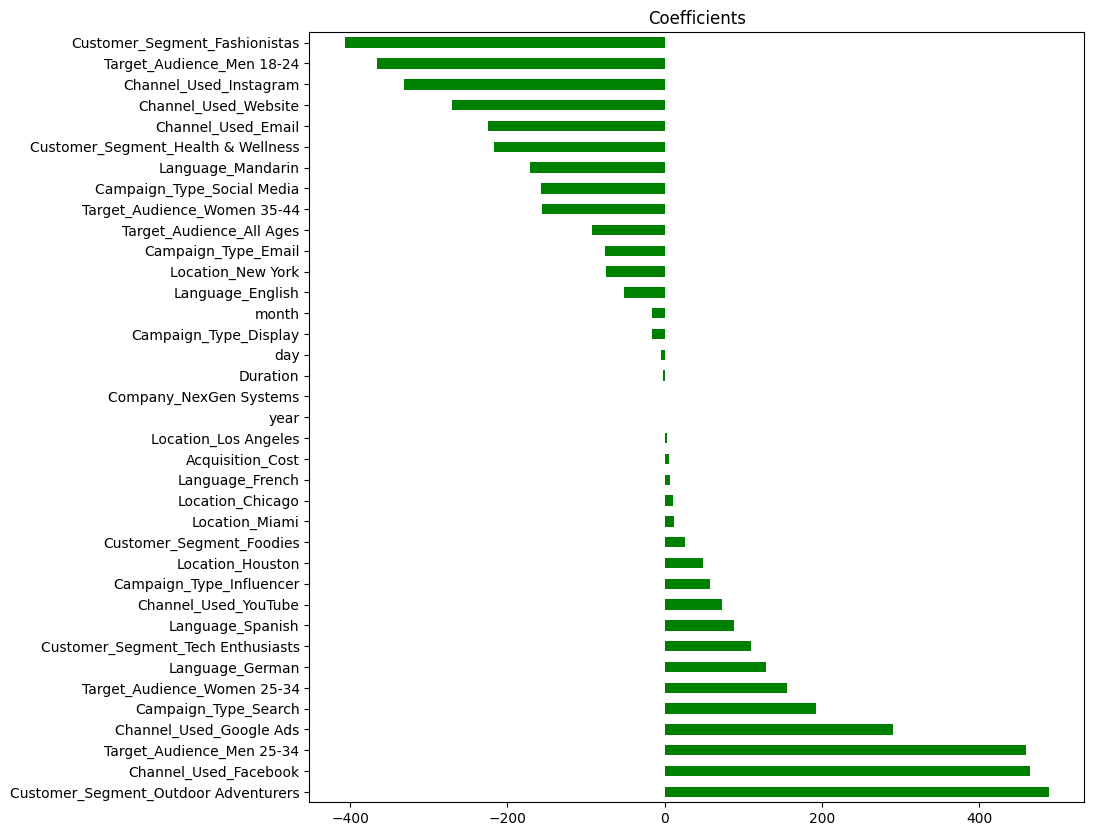

In [191]:
# Visualize the feature importance and coefficients

figure(figsize=(10,10))
lrGraph.plot(kind='barh', title='Coefficients', color='green')


<Axes: title={'center': 'Feature Importance'}>

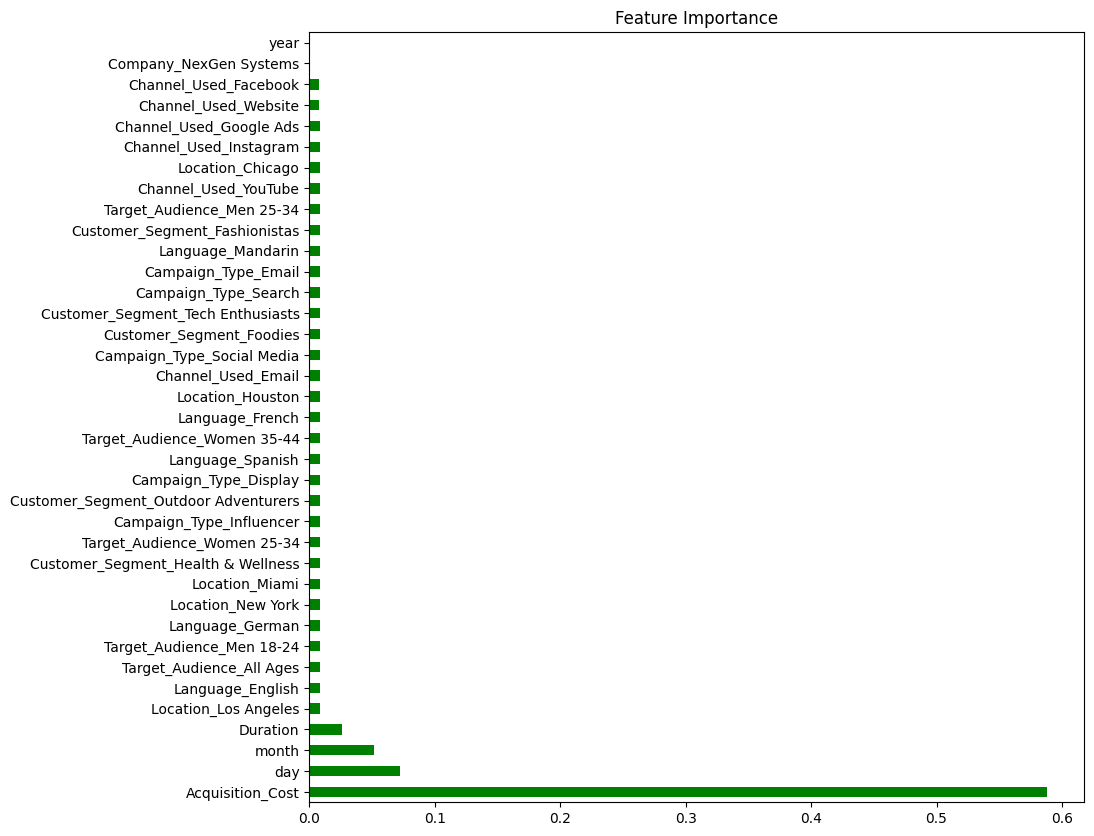

In [192]:
# Visualize the feature importance and coefficients

figure(figsize=(10,10))
rfGraph.plot(kind='barh', title='Feature Importance', color='green')


In [193]:
#Save the models to disk

rf_filename = 'marketing_planner_random_forest_model.sav'
lr_filename = 'marketing_planner_linear_regression_model.sav'
pickle.dump(rfModel, open(rf_filename, 'wb'))
pickle.dump(lrModel, open(lr_filename, 'wb'))
